Importing the required Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Variables	Description:

Prospect ID -	A unique ID with which the customer is identified.

Lead Number -	A lead number assigned to each lead procured.

Lead Origin -	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

Lead Source	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

Do Not Email -	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

Do Not Call -	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted	The target variable. Indicates whether a lead has been successfully converted or not.

TotalVisits -	The total number of visits made by the customer on the website.

Total Time Spent on Website -	The total time spent by the customer on the website.

Page Views Per Visit -	Average number of pages on the website viewed during the visits.

Last Activity -	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

Country -	The country of the customer.

Specialization - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

How did you hear about X Education -	The source from which the customer heard about X Education.

What is your current occupation -	Indicates whether the customer is a student, umemployed or employed.

What matters most to you in choosing this course -	An option selected by the customer indicating what is their main motto behind doing this course.
Search	Indicating whether the customer had seen the ad in any of the listed items.

Magazine

Newspaper Article

X Education Forums

Newspaper

Digital Advertisement

Through Recommendations -	Indicates whether the customer came in through recommendations.

Receive More Updates About Our Courses -	Indicates whether the customer chose to receive more updates about the courses.

Tags	- Tags assigned to customers indicating the current status of the lead.

Lead Quality -	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

Update me on Supply Chain Content -	Indicates whether the customer wants updates on the Supply Chain Content.

Get updates on DM Content	- Indicates whether the customer wants updates on the DM Content.

Lead Profile -	A lead level assigned to each customer based on their profile.

City -	The city of the customer.

Asymmetrique Activity Index	 -An index and score assigned to each customer based on their activity and their profile

Asymmetrique Profile Index

Asymmetrique Activity Score

Asymmetrique Profile Score

I agree to pay the amount through cheque	Indicates whether the customer has agreed to pay the amount through cheque or not.

a free copy of Mastering The Interview	Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

Last Notable Activity	The last notable acitivity performed by the student.


Data Reading and Understanding the data in pandas

In [ ]:
Lead = pd.read_csv("/content/drive/MyDrive/DS/Leads.csv")

In [ ]:
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [ ]:
Lead.shape
Lead.info()
Lead.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


In [ ]:
Lead.describe(include = ['object'])

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


Data Cleaning and preparing for model

Mapping the data with 1, 0 for binary input

In [ ]:
varlist =  ['Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

Lead[varlist] = Lead[varlist].apply(binary_map)

Handling the delimiters

In [ ]:
Lead['Asymmetrique Activity Index'] = Lead["Asymmetrique Activity Index"].fillna('').str.split(".").str[1]
Lead['Asymmetrique Profile Index'] = Lead["Asymmetrique Profile Index"].fillna('').str.split(".").str[1]
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0000,18.0000,No,No,Modified


Lead Number & Prospect ID have all unique values. We will keep Lead Number for identification of the lead. hence dropping only Prospect ID

In [ ]:
Lead = Lead.drop(['Prospect ID'], axis = 1)
Lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0000,15.0000,No,No,Modified
1,660728,API,Organic Search,0,0,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0000,15.0000,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0000,20.0000,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0000,17.0000,No,No,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0000,18.0000,No,No,Modified


To understand the pattern of the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' and co relation with 'Asymmetrique Activity Index' & 'Asymmetrique Profile Index', we are plotting them.

<Axes: xlabel='Asymmetrique Profile Score', ylabel='count'>

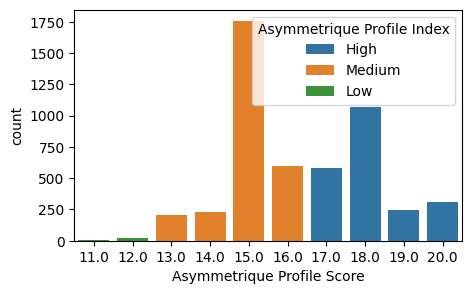

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'Asymmetrique Profile Score', hue ='Asymmetrique Profile Index',data = Lead, hue_order=['High','Medium','Low'])

<Axes: xlabel='Asymmetrique Activity Score', ylabel='count'>

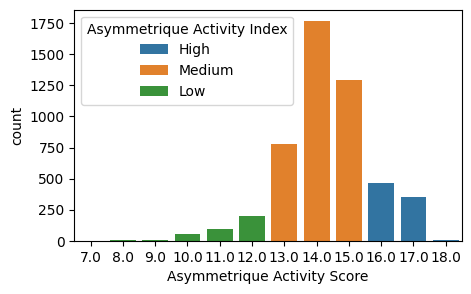

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'Asymmetrique Activity Score', hue ='Asymmetrique Activity Index',data = Lead, hue_order=['High','Medium','Low'])

From the above plots, we observe that columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' are similar as 'Asymmetrique Activity Index' & 'Asymmetrique Profile Index'. Hence we are dropping these columns.

In [ ]:
Lead.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1, inplace = True)

Checking the columns having select value and convering them to NaN value

In [ ]:
Lead.columns[Lead.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [ ]:
dummy1 = pd.get_dummies(Lead[['What is your current occupation', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
Lead = pd.concat([Lead, dummy1], axis=1)

In [ ]:
m1 = pd.get_dummies(telecom['MultipleLines'], prefix = 'MultipleLines')
m1 = m1.drop(['MultipleLines_No phone service'], axis = 1)
telecom = pd.concat([telecom, m1], axis=1)

In [ ]:
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

In [ ]:
o1 = pd.get_dummies(telecom['OnlineSecurity'], prefix = 'OnlineSecurity')
o1 = o1.drop(['OnlineSecurity_No internet service'], axis = 1)
telecom = pd.concat([telecom, o1], axis=1)

In [ ]:
plt.figure(figsize=(5, 5))
sns.pairplot(day)
plt.show()

<Figure size 500x500 with 0 Axes>

<Axes: >

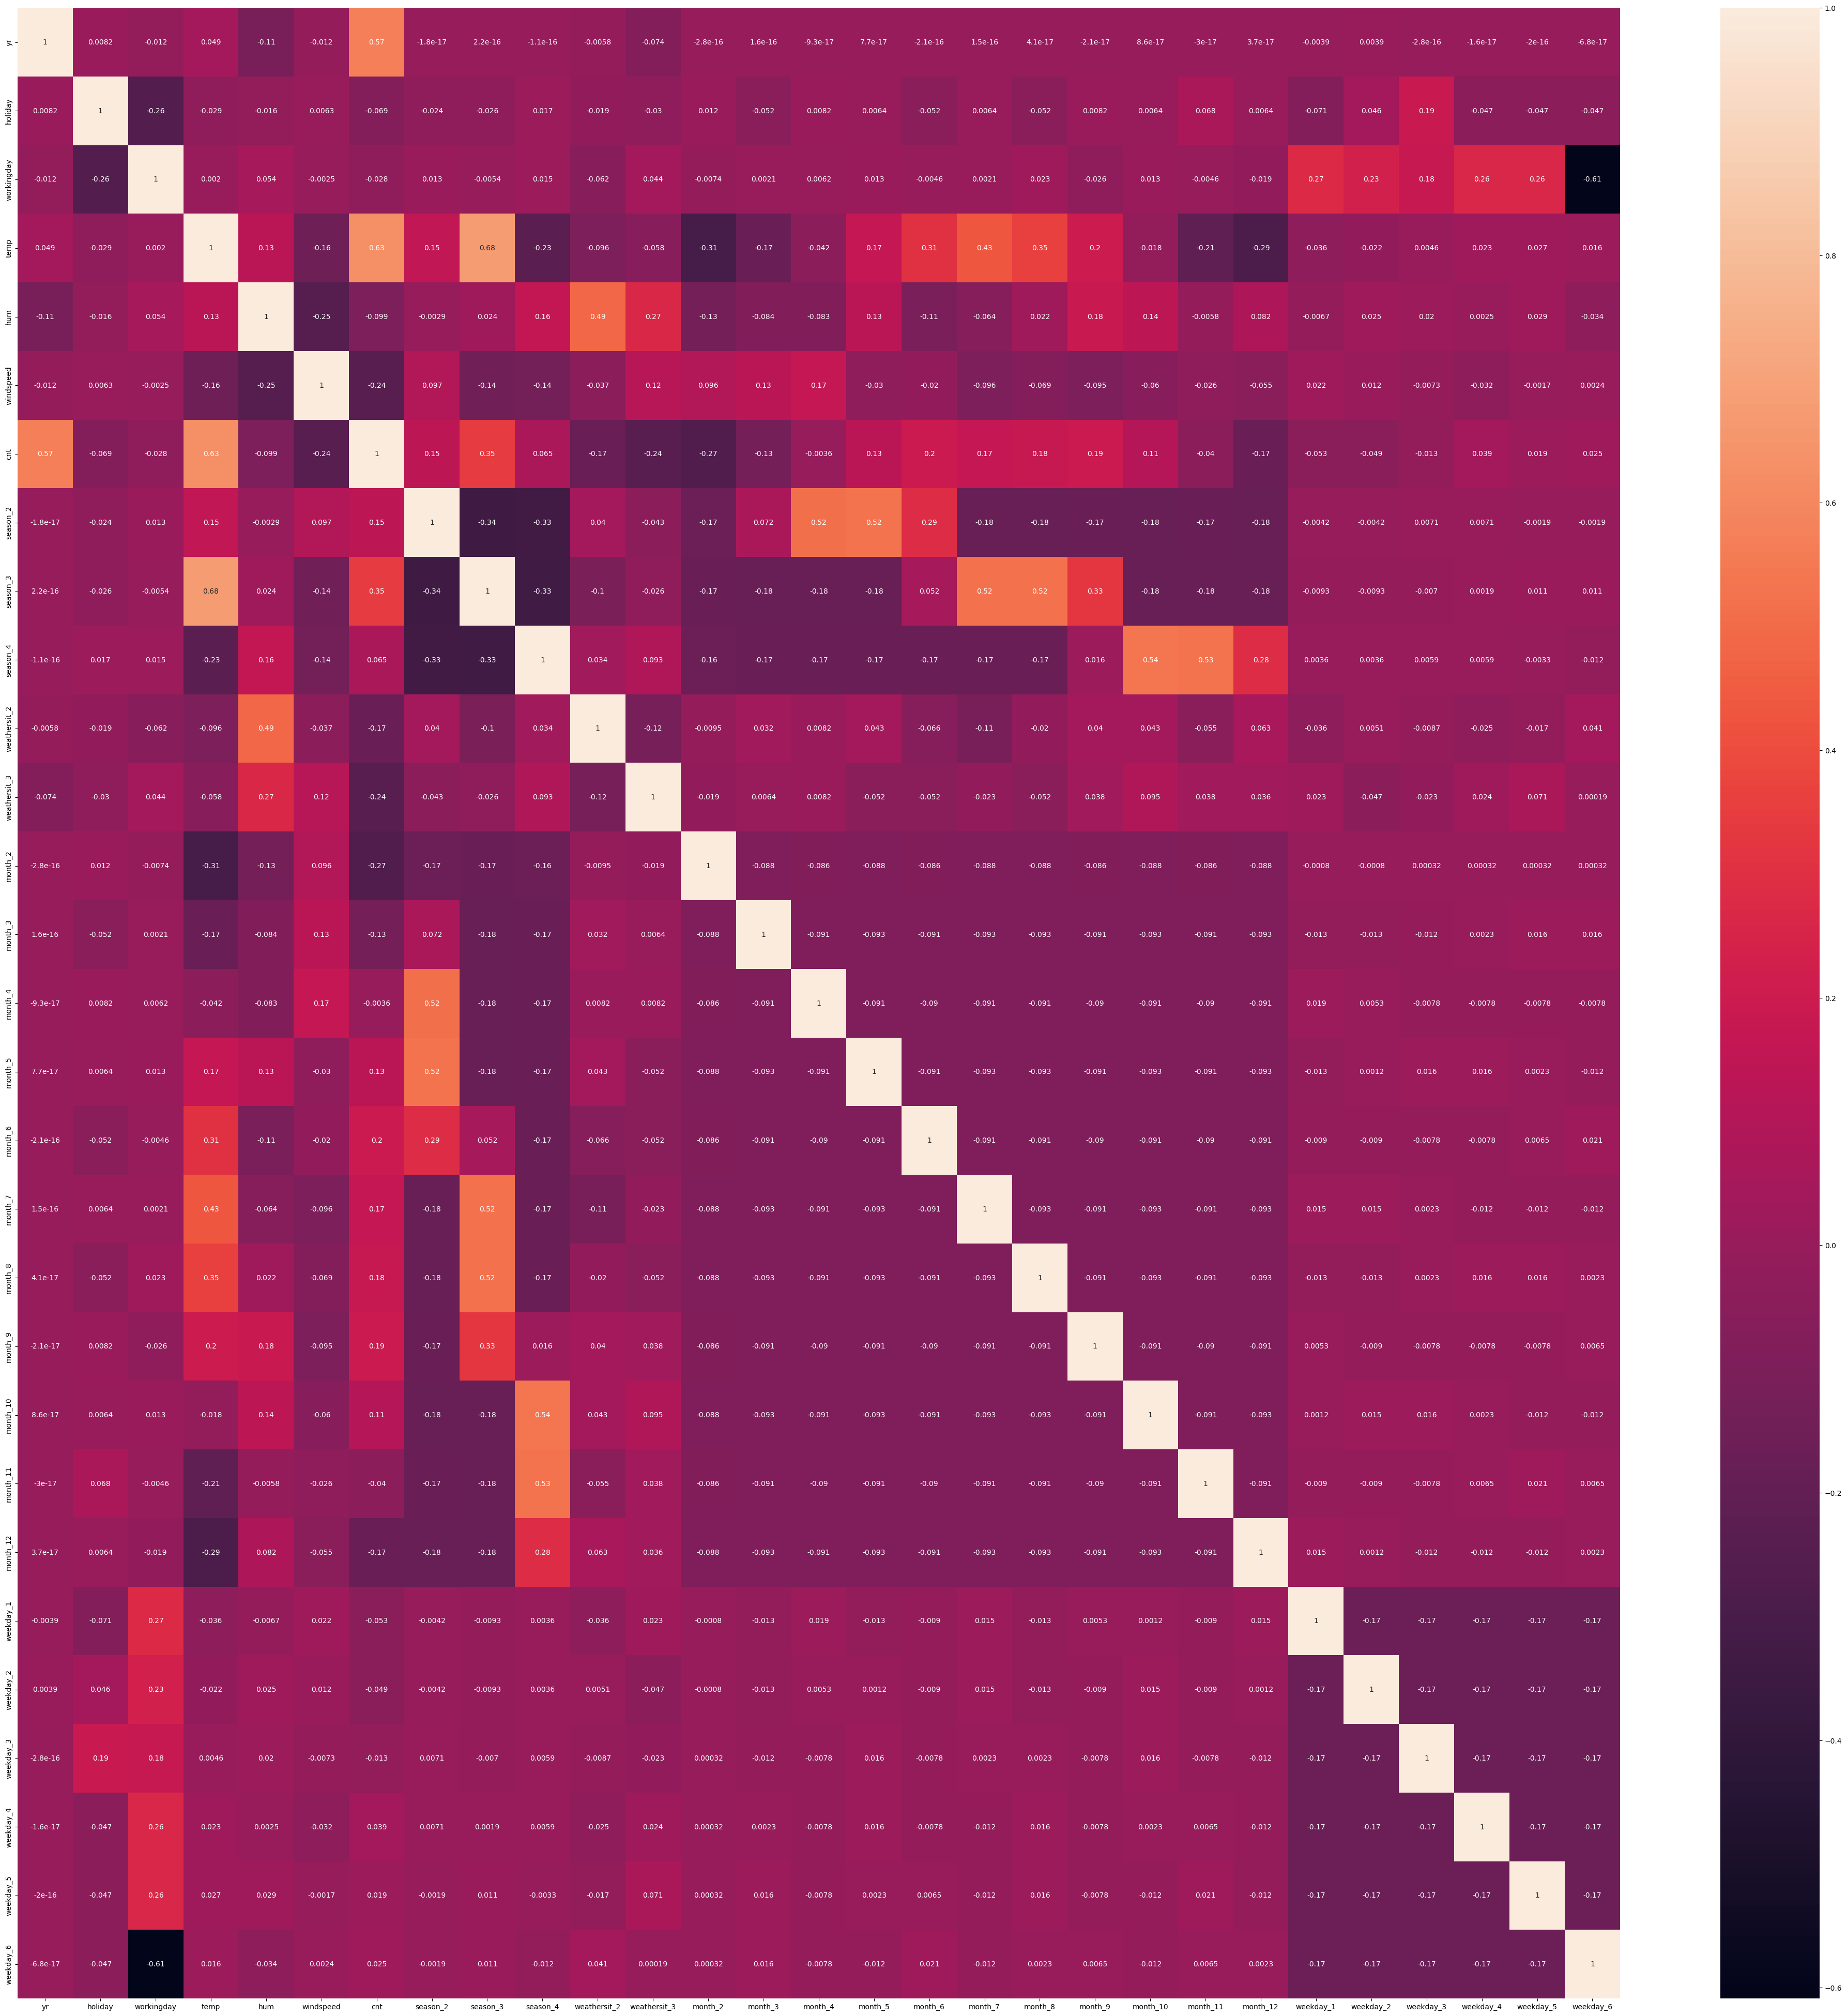

In [ ]:
plt.figure(figsize=(50, 50))
sns.heatmap(day.corr(), annot = True)

creating split for training and test data

In [ ]:
from sklearn.model_selection import train_test_split
day_train, day_test = train_test_split(day, train_size = 0.7, random_state = 100)
day_train.shape, day_test.shape

((510, 29), (220, 29))

Scalling the coefficient thru normalized method to fit in.

In [ ]:
scaler = MinMaxScaler()
day_train[num_cols] = scaler.fit_transform(day_train[num_cols])
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,1,0,1,0.8152,0.7256,0.2647,0.8277,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.4424,0.6402,0.2553,0.4653,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.2451,0.4981,0.6631,0.2041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.3957,0.5045,0.1885,0.4830,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.3458,0.7518,0.3810,0.1911,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking correlation between various nos

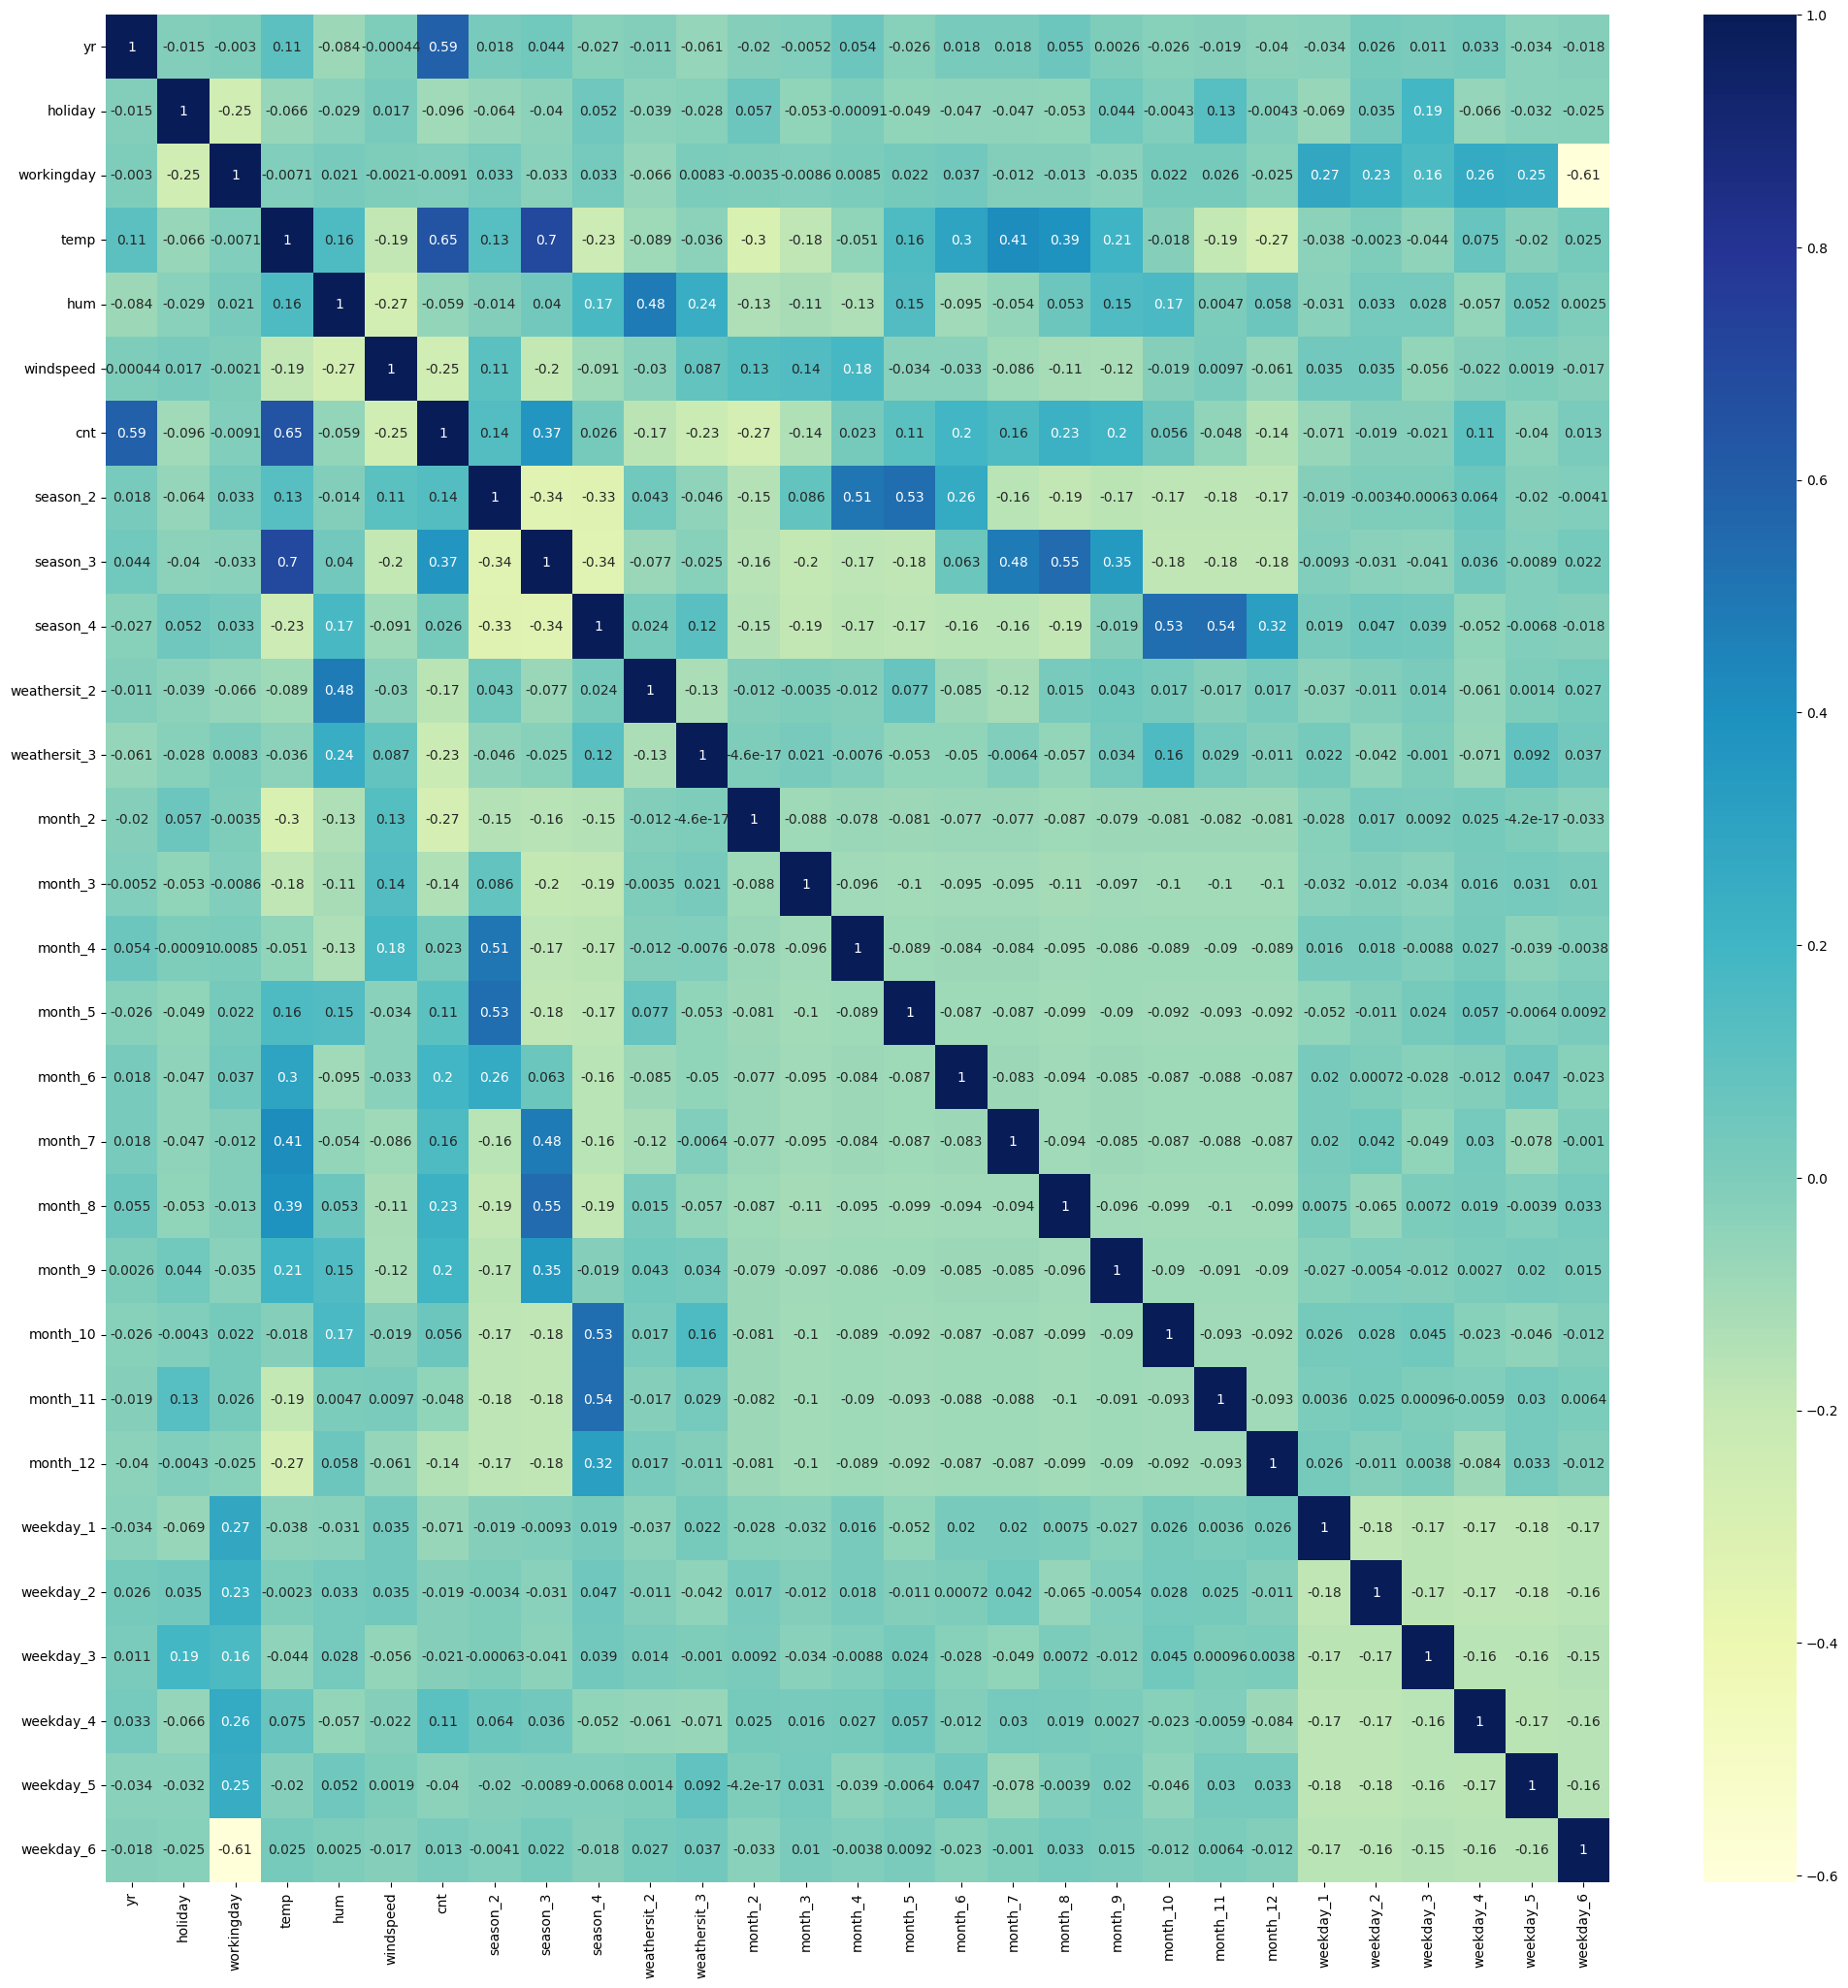

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(day_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

Assigning independent variable and dependent variable

In [ ]:
y_train = day_train.pop('cnt')
X_train = day_train

Adding a constant to get an intercept and then Fit the resgression line using 'OLS' and with one independent variable "temp".

In [ ]:
#Adding another feature to the model
X_train_sm = sm.add_constant(X_train['temp'])
#creating the model
lr = sm.OLS(y_train, X_train_sm)
#fit
lr_model=lr.fit()
# check parameters
print(lr_model.params)
#Summary
print(lr_model.summary())

const   0.1690
temp    0.6409
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.46e-61
Time:                        05:54:19   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

Adding another independent variable "temp", "weekday_4".

In [ ]:
#Adding another feature to the model
X_train_sm = sm.add_constant(X_train[['temp', 'windspeed']])
#creating the model
lr = sm.OLS(y_train, X_train_sm)
#fit
lr_model=lr.fit()
# check parameters
print(lr_model.params)
#Summary
print(lr_model.summary())

const        0.2409
temp         0.6154
windspeed   -0.1811
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.99e-63
Time:                        05:54:24   Log-Likelihood:                 184.13
No. Observations:                 510   AIC:                            -362.3
Df Residuals:                     507   BIC:                            -349.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:
#Adding another feature to the model
X_train_sm = sm.add_constant(X_train[['temp', 'windspeed','weekday_4']])
#creating the model
lr = sm.OLS(y_train, X_train_sm)
#fit
lr_model=lr.fit()
# check parameters
print(lr_model.params)
#Summary
print(lr_model.summary())

const        0.2374
temp         0.6109
windspeed   -0.1805
weekday_4    0.0396
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     131.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           5.72e-63
Time:                        05:54:31   Log-Likelihood:                 185.85
No. Observations:                 510   AIC:                            -363.7
Df Residuals:                     506   BIC:                            -346.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [ ]:
#Adding another feature to the model
X_train_sm = sm.add_constant(X_train)
#creating the model
lr = sm.OLS(y_train, X_train_sm)
#fit
lr_model=lr.fit()
# check parameters
print(lr_model.params)
#Summary
print(lr_model.summary())

const           0.2371
yr              0.2311
holiday        -0.1348
workingday     -0.0600
temp            0.4405
hum            -0.1574
windspeed      -0.1825
season_2        0.0868
season_3        0.0404
season_4        0.1530
weathersit_2   -0.0578
weathersit_3   -0.2499
month_2         0.0268
month_3         0.0650
month_4         0.0642
month_5         0.0889
month_6         0.0726
month_7         0.0357
month_8         0.0915
month_9         0.1550
month_10        0.0698
month_11        0.0247
month_12        0.0198
weekday_1       0.0248
weekday_2       0.0234
weekday_3       0.0392
weekday_4       0.0537
weekday_5       0.0495
weekday_6      -0.0063
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Da

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,229.4470
22,weekday_1,50.7811
23,weekday_2,49.6184
26,weekday_5,48.1593
25,weekday_4,47.0986
3,temp,46.8926
24,weekday_3,43.2661
4,hum,22.6049
7,season_3,15.3514
17,month_8,10.8927


In [ ]:
X= X_train.drop(['workingday', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'season_3', 'season_4'], axis = 1)

In [ ]:
#Adding another feature to the model
X_train_sm = sm.add_constant(X)
#creating the model
lr = sm.OLS(y_train, X_train_sm)
#fit
lr_model=lr.fit()
# check parameters
print(lr_model.params)
#Summary
print(lr_model.summary())

const           0.2245
yr              0.2335
holiday        -0.0990
temp            0.4569
hum            -0.1644
windspeed      -0.2047
season_2        0.0693
weathersit_2   -0.0544
weathersit_3   -0.2448
month_2         0.0292
month_3         0.0711
month_4         0.0785
month_5         0.1008
month_6         0.0886
month_7         0.0640
month_8         0.1225
month_9         0.2132
month_10        0.2158
month_11        0.1727
month_12        0.1244
weekday_6       0.0088
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          6.74e-177
Time:                        06:07:22   Log-Likelihood:                 498.74
No. Observations:           

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,45.5982
3,hum,18.8991
11,month_5,6.5517
14,month_8,6.4457
5,season_2,6.2674
12,month_6,6.1654
13,month_7,6.1120
10,month_4,4.9653
15,month_9,4.2896
4,windspeed,4.2316


ValueError: x and y must be the same size

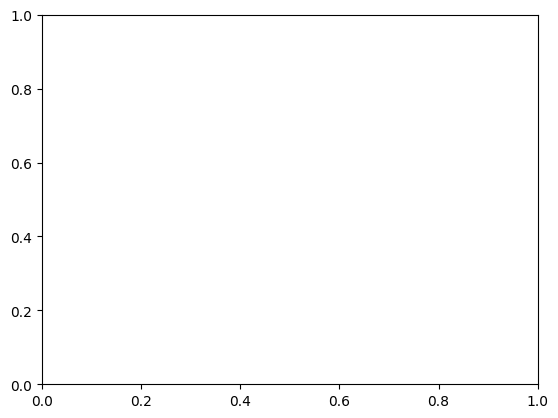

In [ ]:
plt.scatter(X_train_sm, y_train)
plt.plot(X_train_sm, 0.1690 + 0.6409*X_train_sm, 'r')
plt.show()

In [ ]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

,0
653,7957.70
576,7531.28
426,3855.14
728,1889.37
482,3843.42


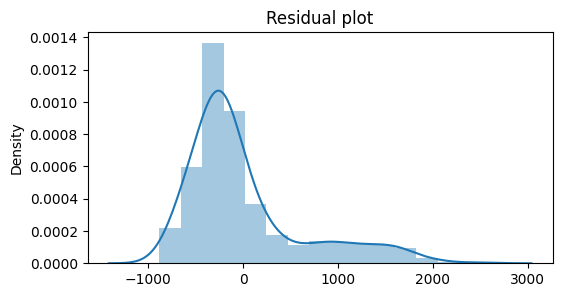

In [ ]:
res = (y_train - y_train_pred)
plt.figure(figsize=(6, 3))
sns.distplot(res, bins = 15)
plt.title("Residual plot")
plt.show()

In [ ]:
# Add a constant to get an intercept
X_test_sm = sm.add_constant(X_test)
y_test_sm = sm.add_constant(y_test)

In [ ]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

,0
184,3700.50
535,6466.39
299,3045.64
221,4775.93
152,5169.55


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_test_pred)
r2

0.8790888904213353

In [ ]:
mean_squared_error(y_test, y_test_pred)

433871.30051306944

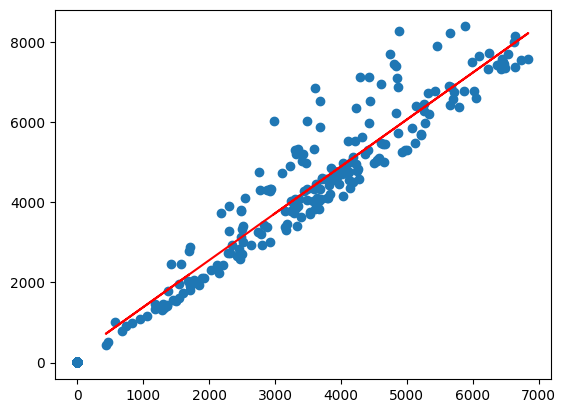

In [ ]:
plt.scatter(X_test_sm, y_test_sm)
plt.plot(X_test_sm, 211.7981 + 1.1715*X_test_sm, 'r')
plt.show()

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )

In [ ]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

    # Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)